In [518]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [519]:
flight_data = pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv")
flight_data

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [520]:
months = pd.to_datetime(flight_data.pop('Month'), format='%Y.%m')

In [521]:
scaler = MinMaxScaler(feature_range=(0,1))
flight_data = scaler.fit_transform(flight_data)

In [522]:
def create_dataset(dataset, window=1):
  scaler = MinMaxScaler(feature_range=(0,1))
  dataset = scaler.fit_transform(dataset)
  dataset = pd.DataFrame(dataset,columns=["Passengers"])

  for i in range(window):
    dataset[f"y_{i+1}"] = dataset["Passengers"].shift(i+1)
  #print(flight_data)
  x_data = dataset.dropna().drop("Passengers", axis=1).astype(np.float32)
  y_data = dataset.dropna()["Passengers"].astype(np.float32)

  return x_data, y_data

In [523]:
window = 12
x_data, y_data = create_dataset(flight_data,window)

In [524]:
x_data

,y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12
12,0.027027,0.000000,0.028958,0.061776,0.084942,0.084942,0.059846,0.032819,0.048263,0.054054,0.027027,0.015444
13,0.021236,0.027027,0.000000,0.028958,0.061776,0.084942,0.084942,0.059846,0.032819,0.048263,0.054054,0.027027
14,0.042471,0.021236,0.027027,0.000000,0.028958,0.061776,0.084942,0.084942,0.059846,0.032819,0.048263,0.054054
15,0.071429,0.042471,0.021236,0.027027,0.000000,0.028958,0.061776,0.084942,0.084942,0.059846,0.032819,0.048263
16,0.059846,0.071429,0.042471,0.021236,0.027027,0.000000,0.028958,0.061776,0.084942,0.084942,0.059846,0.032819
...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.000000,0.832046,0.710425,0.689189,0.608108,0.554054,0.604247,0.581081,0.498069,0.584942,0.693050,0.878378
140,0.969112,1.000000,0.832046,0.710425,0.689189,0.608108,0.554054,0.604247,0.581081,0.498069,0.584942,0.693050
141,0.779923,0.969112,1.000000,0.832046,0.710425,0.689189,0.608108,0.554054,0.604247,0.581081,0.498069,0.584942
142,0.689189,0.779923,0.969112,1.000000,0.832046,0.710425,0.689189,0.608108,0.554054,0.604247,0.581081,0.498069


In [525]:
x_data.to_numpy().shape

(132, 12)

In [526]:
y_data

12     0.021236
13     0.042471
14     0.071429
15     0.059846
16     0.040541
         ...   
139    0.969112
140    0.779923
141    0.689189
142    0.552124
143    0.633205
Name: Passengers, Length: 132, dtype: float32

In [527]:
y_data.to_numpy().shape

(132,)

In [528]:
train_X = x_data[:int(len(x_data)*0.7)].to_numpy()
test_X = x_data[int(len(x_data)*0.7):].to_numpy()

train_y = y_data[:int(len(x_data)*0.7)].to_numpy()
test_y = y_data[int(len(x_data)*0.7):].to_numpy()


In [529]:
train_X.shape,test_X.shape,train_y.shape,test_y.shape

((92, 12), (40, 12), (92,), (40,))

In [530]:
train_X,train_y

(array([[0.02702703, 0.        , 0.02895753, ..., 0.05405406, 0.02702703,
         0.01544402],
        [0.02123552, 0.02702703, 0.        , ..., 0.04826255, 0.05405406,
         0.02702703],
        [0.04247104, 0.02123552, 0.02702703, ..., 0.03281853, 0.04826255,
         0.05405406],
        ...,
        [0.484556  , 0.47104248, 0.4864865 , ..., 0.5810811 , 0.5965251 ,
         0.5212355 ],
        [0.6138996 , 0.484556  , 0.47104248, ..., 0.484556  , 0.5810811 ,
         0.5965251 ],
        [0.6969112 , 0.6138996 , 0.484556  , ..., 0.3899614 , 0.484556  ,
         0.5810811 ]], dtype=float32),
 array([0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054,
        0.08687259, 0.12741312, 0.12741312, 0.1042471 , 0.05598456,
        0.01930502, 0.06949807, 0.07915058, 0.08880309, 0.14285715,
        0.11389961, 0.13127413, 0.14285715, 0.18339768, 0.18339768,
        0.15444015, 0.11196911, 0.08108108, 0.11969112, 0.12934363,
        0.14671814, 0.17181467, 0.14864865, 0.15250966

In [531]:
train_X.shape[0]

92

In [532]:
#train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
train_X

array([[[0.02702703],
        [0.        ],
        [0.02895753],
        ...,
        [0.05405406],
        [0.02702703],
        [0.01544402]],

       [[0.02123552],
        [0.02702703],
        [0.        ],
        ...,
        [0.04826255],
        [0.05405406],
        [0.02702703]],

       [[0.04247104],
        [0.02123552],
        [0.02702703],
        ...,
        [0.03281853],
        [0.04826255],
        [0.05405406]],

       ...,

       [[0.484556  ],
        [0.47104248],
        [0.4864865 ],
        ...,
        [0.5810811 ],
        [0.5965251 ],
        [0.5212355 ]],

       [[0.6138996 ],
        [0.484556  ],
        [0.47104248],
        ...,
        [0.484556  ],
        [0.5810811 ],
        [0.5965251 ]],

       [[0.6969112 ],
        [0.6138996 ],
        [0.484556  ],
        ...,
        [0.3899614 ],
        [0.484556  ],
        [0.5810811 ]]], dtype=float32)

In [533]:
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))
test_X

array([[[0.7007722 ],
        [0.6969112 ],
        [0.6138996 ],
        [0.484556  ],
        [0.47104248],
        [0.4864865 ],
        [0.38030887],
        [0.4073359 ],
        [0.3899614 ],
        [0.32239383],
        [0.3899614 ],
        [0.484556  ]],

       [[0.57915056],
        [0.7007722 ],
        [0.6969112 ],
        [0.6138996 ],
        [0.484556  ],
        [0.47104248],
        [0.4864865 ],
        [0.38030887],
        [0.4073359 ],
        [0.3899614 ],
        [0.32239383],
        [0.3899614 ]],

       [[0.46911198],
        [0.57915056],
        [0.7007722 ],
        [0.6969112 ],
        [0.6138996 ],
        [0.484556  ],
        [0.47104248],
        [0.4864865 ],
        [0.38030887],
        [0.4073359 ],
        [0.3899614 ],
        [0.32239383]],

       [[0.3880309 ],
        [0.46911198],
        [0.57915056],
        [0.7007722 ],
        [0.6969112 ],
        [0.6138996 ],
        [0.484556  ],
        [0.47104248],
        [0.4864865 ],
    

In [534]:
train_X.shape,test_X.shape

((92, 12, 1), (40, 12, 1))

In [535]:
batch_size=1

In [536]:
lstm_window = Sequential()
#lstm_window.add(LSTM(4, input_shape=(1, window)))
#lstm_window.add(LSTM(4, input_shape=(window, 1)))
lstm_window.add(LSTM(4, batch_input_shape=(batch_size, window, 1), stateful=True, return_sequences=True))
lstm_window.add(LSTM(4, batch_input_shape=(batch_size, window, 1), stateful=True))
lstm_window.add(Dense(1))

lstm_window.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
#history = lstm_window.fit(train_X,train_y, epochs=1000, verbose=2)

In [537]:
for i in range(100):
 lstm_window.fit(train_X,train_y, epochs=1, batch_size=batch_size, verbose=2, shuffle=False)
 lstm_window.reset_states()

92/92 - 4s - loss: 0.0062 - mse: 0.0062 - 4s/epoch - 46ms/step
92/92 - 1s - loss: 0.0158 - mse: 0.0158 - 706ms/epoch - 8ms/step
92/92 - 1s - loss: 0.0108 - mse: 0.0108 - 630ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0073 - mse: 0.0073 - 586ms/epoch - 6ms/step
92/92 - 1s - loss: 0.0059 - mse: 0.0059 - 707ms/epoch - 8ms/step
92/92 - 1s - loss: 0.0057 - mse: 0.0057 - 652ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0058 - mse: 0.0058 - 879ms/epoch - 10ms/step
92/92 - 1s - loss: 0.0058 - mse: 0.0058 - 854ms/epoch - 9ms/step
92/92 - 1s - loss: 0.0057 - mse: 0.0057 - 677ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0057 - mse: 0.0057 - 631ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0056 - mse: 0.0056 - 647ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0056 - mse: 0.0056 - 672ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0056 - mse: 0.0056 - 622ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0055 - mse: 0.0055 - 682ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0055 - mse: 0.0055 - 689ms/epoch - 7ms/step
92/92 - 1s - loss: 0.0055 

In [538]:
trainPredict = lstm_window.predict(train_X, batch_size=batch_size)
lstm_window.reset_states()
testPredict = lstm_window.predict(test_X, batch_size=batch_size)

40/40 [==============================] - 0s 5ms/step


In [539]:
trainPredict.shape,testPredict.shape

((92, 1), (40, 1))

In [540]:
trainPredict[:,0]

array([0.10818181, 0.09649478, 0.09309562, 0.09347714, 0.09426487,
       0.09532237, 0.09571166, 0.09493048, 0.09376764, 0.0937614 ,
       0.09544564, 0.09888327, 0.10311258, 0.10813305, 0.11251213,
       0.11653574, 0.1207006 , 0.1270777 , 0.1310529 , 0.13174579,
       0.13117816, 0.13162526, 0.135555  , 0.14346221, 0.15089272,
       0.15772396, 0.16457422, 0.16786195, 0.17181845, 0.17499517,
       0.17907913, 0.17984848, 0.17975987, 0.17983128, 0.18348593,
       0.19114374, 0.19892569, 0.20620146, 0.21213353, 0.2187209 ,
       0.22900796, 0.24098144, 0.24662517, 0.24778487, 0.24398617,
       0.24276187, 0.24527709, 0.2527148 , 0.25976658, 0.2675165 ,
       0.27590644, 0.27899784, 0.27986693, 0.28247476, 0.28471112,
       0.28309774, 0.27445138, 0.26784897, 0.2659974 , 0.27295387,
       0.28116667, 0.2909528 , 0.30791807, 0.31893212, 0.33221835,
       0.34637427, 0.35691124, 0.35615593, 0.3487774 , 0.3443994 ,
       0.3468157 , 0.35950112, 0.372891  , 0.38494033, 0.40352

In [541]:
train_y

array([0.02123552, 0.04247104, 0.07142857, 0.05984556, 0.04054054,
       0.08687259, 0.12741312, 0.12741312, 0.1042471 , 0.05598456,
       0.01930502, 0.06949807, 0.07915058, 0.08880309, 0.14285715,
       0.11389961, 0.13127413, 0.14285715, 0.18339768, 0.18339768,
       0.15444015, 0.11196911, 0.08108108, 0.11969112, 0.12934363,
       0.14671814, 0.17181467, 0.14864865, 0.15250966, 0.22007722,
       0.24324325, 0.26640928, 0.2027027 , 0.16795367, 0.13127413,
       0.17374517, 0.17760618, 0.17760618, 0.25482625, 0.25289574,
       0.24131274, 0.26833978, 0.3088803 , 0.3243243 , 0.25675675,
       0.20656371, 0.14671814, 0.18725869, 0.19305019, 0.16216215,
       0.25289574, 0.23745173, 0.25096524, 0.3088803 , 0.38223937,
       0.36486486, 0.2992278 , 0.24131274, 0.19111969, 0.24131274,
       0.26640928, 0.24903475, 0.3146718 , 0.31853282, 0.32046333,
       0.4073359 , 0.5019305 , 0.46911198, 0.4015444 , 0.32818532,
       0.25675675, 0.33590734, 0.34749034, 0.33397684, 0.41119

In [542]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([train_y])

testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([test_y])

In [543]:
trainPredict

array([[160.03818],
       [153.9843 ],
       [152.22354],
       [152.42117],
       [152.8292 ],
       [153.37698],
       [153.57864],
       [153.174  ],
       [152.57164],
       [152.5684 ],
       [153.44084],
       [155.22153],
       [157.41231],
       [160.01291],
       [162.28128],
       [164.36552],
       [166.5229 ],
       [169.82625],
       [171.8854 ],
       [172.24431],
       [171.95029],
       [172.18188],
       [174.21748],
       [178.31342],
       [182.16243],
       [185.701  ],
       [189.24945],
       [190.9525 ],
       [193.00197],
       [194.6475 ],
       [196.763  ],
       [197.16151],
       [197.11562],
       [197.1526 ],
       [199.0457 ],
       [203.01247],
       [207.04352],
       [210.81236],
       [213.88516],
       [217.29742],
       [222.62611],
       [228.8284 ],
       [231.75185],
       [232.35257],
       [230.38484],
       [229.75066],
       [231.05354],
       [234.90627],
       [238.55908],
       [242.57355],


In [544]:
trainY[0]

array([115.00000034, 126.00000067, 141.00000165, 134.99999972,
       124.99999906, 148.99999909, 169.99999815, 169.99999815,
       157.99999814, 133.00000036, 113.99999969, 140.00000004,
       145.00000037, 150.0000007 , 178.00000331, 162.99999847,
       172.00000137, 178.00000331, 198.99999851, 198.99999851,
       183.99999753, 162.00000072, 145.99999812, 165.99999943,
       170.99999976, 179.99999881, 192.99999657, 181.00000042,
       183.00000364, 217.99999821, 230.00000209, 242.00000596,
       208.99999917, 191.00000107, 172.00000137, 193.99999818,
       196.0000014 , 196.0000014 , 235.9999963 , 234.9999947 ,
       229.00000048, 243.00000757, 263.99999505, 271.99999249,
       236.99999791, 211.00000238, 179.99999881, 201.00000173,
       203.99999884, 187.99999624, 234.9999947 , 226.99999726,
       233.99999309, 263.99999505, 301.99999446, 292.99999541,
       259.00000244, 229.00000048, 202.99999723, 229.00000048,
       242.00000596, 232.9999992 , 266.99999988, 269.00

In [545]:
train_score = np.sqrt(mean_squared_error(trainPredict[:,0],trainY[0]))
test_score = np.sqrt(mean_squared_error(testPredict[:,0],testY[0]))
train_score,test_score

(29.915909094102137, 67.1500938959104)

In [546]:
#plt.plot(history.history['mse'])

In [547]:
trainPredict.shape

(92, 1)

In [548]:
testPredict.shape

(40, 1)

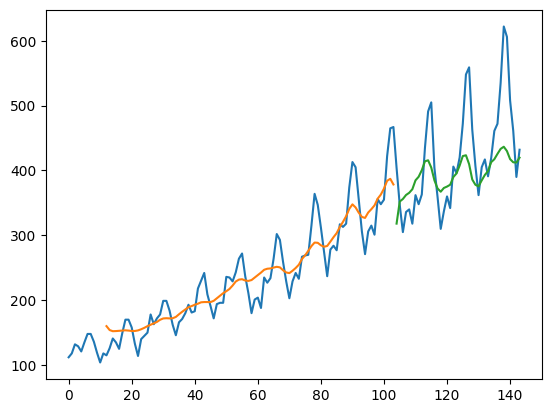

In [549]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(flight_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[12:104, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(flight_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[104:len(flight_data), :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(flight_data))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [2]:
import numpy as np
in_seq1 = np.array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = np.array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = np.array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])

In [3]:
out_seq

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [4]:
from numpy import array
from numpy import hstack
# define input sequence
in_seq1 = array([10, 20, 30, 40, 50, 60, 70, 80, 90])
in_seq2 = array([15, 25, 35, 45, 55, 65, 75, 85, 95])
out_seq = array([in_seq1[i]+in_seq2[i] for i in range(len(in_seq1))])
out_seq

array([ 25,  45,  65,  85, 105, 125, 145, 165, 185])

In [6]:
# convert to [rows, columns] structure
in_seq1 = in_seq1.reshape((len(in_seq1), 1))
print(in_seq1)
in_seq2 = in_seq2.reshape((len(in_seq2), 1))
out_seq = out_seq.reshape((len(out_seq), 1))
# horizontally stack columns
dataset = hstack((in_seq1, in_seq2, out_seq))
print(dataset)

[[10]
 [20]
 [30]
 [40]
 [50]
 [60]
 [70]
 [80]
 [90]]
[[ 10  15  25]
 [ 20  25  45]
 [ 30  35  65]
 [ 40  45  85]
 [ 50  55 105]
 [ 60  65 125]
 [ 70  75 145]
 [ 80  85 165]
 [ 90  95 185]]
